DATA PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset = pd.read_csv("/DS - Assignment Part 1 data set.csv")
print(dataset.shape)
dataset.head()


(414, 9)


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


LOAD DATASET


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
dataset.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
dataset.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

EXPLORATORY DATA ANALYSIS


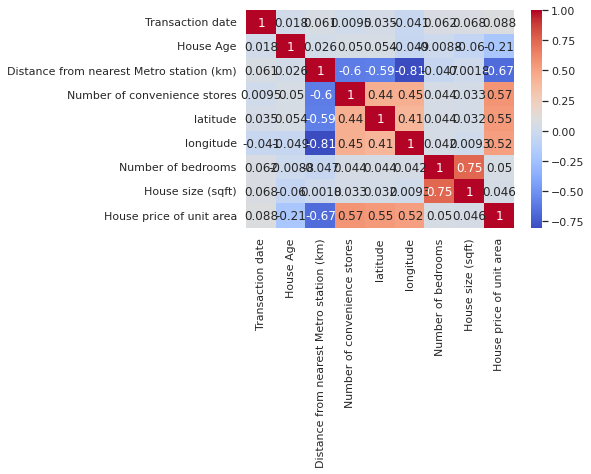

In [ ]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(dataset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


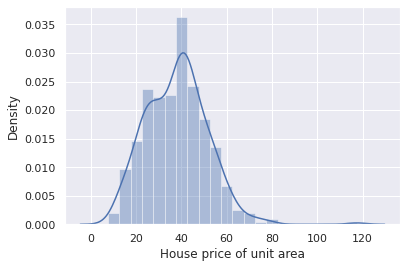

In [ ]:
sns.distplot(dataset['House price of unit area'])

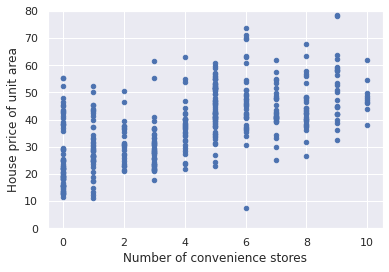

In [ ]:

var = 'Number of convenience stores'
data = pd.concat([dataset['House price of unit area'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='House price of unit area', ylim=(0,80))

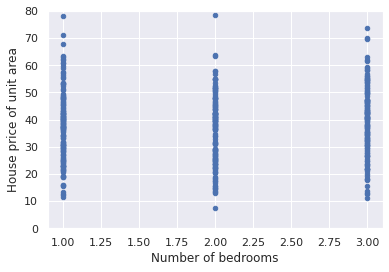

In [ ]:
var = 'Number of bedrooms'
data = pd.concat([df['House price of unit area'], df[var]], axis=1)
data.plot.scatter(x=var, y='House price of unit area', ylim=(0,80))

In [ ]:
dataset.drop(columns='Transaction date', inplace=True, axis=1)


PREDICTIVE MODELLING

In [ ]:
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.model_selection import train_test_split

In [ ]:
dataset.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [ ]:
X = dataset.drop(['House price of unit area'], axis=1)
y = dataset[['House price of unit area']]
## Normalize
from sklearn.preprocessing import Normalizer
scale=Normalizer()
NS=scale.fit_transform(X)
## Split the data
X_train, X_test, y_train, y_test = train_test_split(NS, y, test_size=0.2, random_state=3500)
X.shape, y.shape

((414, 7), (414, 1))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#calculate Accuracy score of regression model on training set
train_accuracy = lr.score(X_train, y_train)
print(train_accuracy)
#calculate Accuracy score of regression model on testing set
test_accuracy = lr.score(X_test, y_test)
print(test_accuracy)

from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)

0.6175630443208597
0.5909326335181871


In [ ]:
1 - (1-lr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

-4791200.430652

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
print('MSE: %.2f' % MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))
print('R2 value:',r2.round(2))

MSE: 74.19
RMSE :  8.613498
R2 value: 0.59


Text(0, 0.5, 'y_pred')

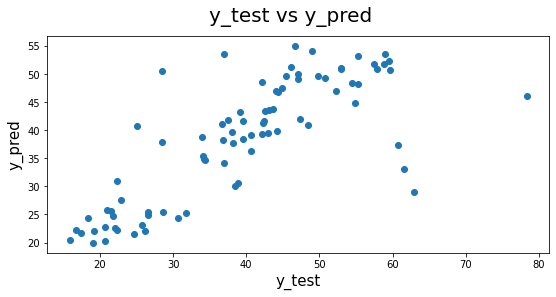

In [ ]:
fig = plt.figure(figsize=(9, 4))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=15) # X-label
plt.ylabel('y_pred', fontsize=15) # Y-label


In [ ]:
# by XG BOOST
import xgboost
from xgboost import XGBRegressor
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30000)

In [ ]:

xgb_r.fit(X_train, y_train)
# Predict the model
prediction = xgb_r.predict(X_test)

[12:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#calculate Accuracy score of regression model on training set
train_score = xgb_r.score(X_train, y_train)
print(train_score)
#calculate Accuracy score of regression model on testing set
test_score = xgb_r.score(X_test, y_test)
print(test_score)

-0.4579604994710358
-0.15266914151570532


In [ ]:
from sklearn.metrics import r2_score 
xgr2 = r2_score(y_test, prediction)

In [ ]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction))
print('MSE: %.2f' % MSE(y_test, prediction))
print("RMSE : % f" %(rmse))
print('R2 value:',xgr2.round(2))

MSE: 309.74
RMSE :  17.599474
R2 value: -0.15


Text(0, 0.5, 'y_pred')

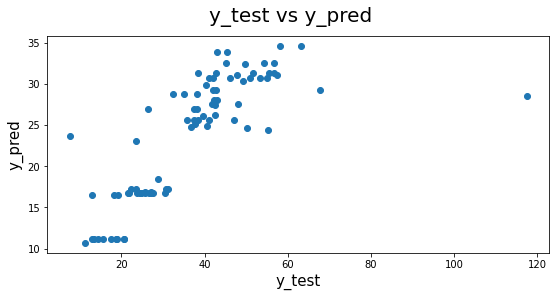

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(9, 4))
plt.scatter(y_test, prediction)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=15) # X-label
plt.ylabel('y_pred', fontsize=15) # Y-label

In [ ]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(NS, y, test_size=0.2, random_state=3500)
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
prediction_lass = lasso.predict(X_test)
trainl_score=lasso.score(X_train,y_train)
print('Train dataset accuracy score',trainl_score.round(1))
testl_score=lasso.score(X_test,y_test)
print('Test dataset accuracy score',testl_score.round(1))


Train dataset accuracy score 0.6
Test dataset accuracy score 0.5


In [ ]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction_lass))
print('MSE: %.2f' % MSE(y_test, prediction_lass))
print("RMSE : % f" %(rmse))
lassor2 = r2_score(y_test, prediction_lass)
print('R2 value:',lassor2.round(2))

MSE: 82.09
RMSE :  9.060118
R2 value: 0.55


In [ ]:
#RIDGE
from sklearn.linear_model import Ridge
Ridgee = Ridge(alpha=0.03)
Ridgee.fit(X_train,y_train)
prediction_ridge = Ridgee.predict(X_test)

rtrain_score=Ridgee.score(X_train,y_train)
print('Train dataset accuracy score',rtrain_score.round(1))
rtest_score=Ridgee.score(X_test,y_test)
print('Test dataset accuracy score',rtest_score.round(1))

Train dataset accuracy score 0.6
Test dataset accuracy score 0.6


In [ ]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, prediction_ridge))
print('MSE: %.2f' % MSE(y_test, prediction_ridge))
print("RMSE : % f" %(rmse))
ridger2 = r2_score(y_test, prediction_ridge)
print('R2 value:',ridger2.round(2))


MSE: 78.32
RMSE :  8.849931
R2 value: 0.57


DECISION TREE REGRESSION

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
regressor.fit(X_train, y_train)

y_pred_ds = regressor.predict(X_test)


In [ ]:
dtrain_score=regressor.score(X_train,y_train)
print('Train dataset accuracy score',dtrain_score.round(2))
dtest_score=regressor.score(X_test,y_test)
print('Test dataset accuracy score',dtest_score.round(2))



Train dataset accuracy score 1.0
Test dataset accuracy score 0.72


In [ ]:
# Metrics
rmse = np.sqrt(MSE(y_test, y_pred_ds))
print('MSE: %.2f' % MSE(y_test, y_pred_ds))
print("RMSE : % f" %(rmse))
deciscionr2 = r2_score(y_test, y_pred_ds)
print('R2 value:',deciscionr2.round(2))


MSE: 50.61
RMSE :  7.113876
R2 value: 0.72


RANDOM FOREST


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
random = RandomForestRegressor(n_estimators = 100, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=200000)
# fit the regressor with x and y data
random.fit(X_train, y_train)
y_pred_rf = random.predict(X_test)


     

rtrain_score=random.score(X_train,y_train)
print('Train dataset accuracy score',rtrain_score.round(2))
rtest_score=random.score(X_test,y_test)
print('Test dataset accuracy score',rtest_score.round(2))

Train dataset accuracy score 0.95
Test dataset accuracy score 0.84


In [ ]:
# Metrics
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print('MSE: %.2f' % MSE(y_test, y_pred_rf))
print("RMSE : % f" %(rmse))
forest_r2 = r2_score(y_test, y_pred_rf)
print('R2 value:', forest_r2.round(2))


MSE: 30.67
RMSE :  5.537938
R2 value: 0.84


Final predictions and Observations
We build our House price prediction models with different Regression techniques
With Linear Regression :--- We got MSE: 74.19

                            >>   RMSE :  8.613498
                            >> R2 value: 0.59   ### Our Linear Regression model will able to explain only 59% of data ###
        >> Train accuracy : 0.61
        >> Test data accuracy : 0.59
        >> Draw Back:-- Less accuracy

With Lasso Regression :---- We got MSE: 82.09

                            >> RMSE :  9.060118
                            >> R2 value: 0.55  ### Our Lasso Regression model will able to explain only 55% of data ###
        >> Train dataset accuracy score 0.6
        >> Test dataset accuracy score 0.5 
        >> Draw Back:-- Less accuracy 


With Ridge Regression :---- We got MSE: 78.32

                            >> RMSE :  8.849931
                            >> R2 value: 0.57  ### Our Ridge Regression model will able to explain only 57% of data ###
        >> Train dataset accuracy score 0.6
        >> Test dataset accuracy score 0.6 
        >> Draw Back:-- Less accuracy 


With Decision tree Regression :---- We got MSE: 50.61

                            >> RMSE :  7.11
                            >> R2 value: 0.72  ### Our Decision Regression model will able to explain only 72% of data ### and error rate also decreased
        >> Train dataset accuracy score 1.0
        >> Test dataset accuracy score 0.72  
        >> Draw Back:-- Accuracy is 72% but model is over fitted 


With Random forest Regression :---- We got MSE: 30.67

                            >> RMSE :  5.54
                            >> R2 value: 0.84  ### Our Random forest Regression model will able to explain 84% of data ### and error rate also decreased
        >> Train dataset accuracy score 0.95
        >> Test dataset accuracy score 0.84  
        >> Draw Back:-- We got better Accuracy is 84% but model is over fitted 

I preferred model with less error rate (in means of MSE & RMSE) and Better accuracy on test scores. In Random forest Our Error rate RMSE decreased from 8.61 to 5.4 at the same time our model is perfectly fit. It given better accuracy when compared to the other models. Our Mean squre error is very less in Random forest Regression model when compared to other models. So I finalized Parameters tuned Random forest Regressor is best suitable model for House price prediction.

Best fit models according to Test data scores
Random Forest_tuned :--- 0.85
Decision tree :--- 0.72
Ridge Regression :--- 0.60
Linear Regression :--- 0.59
Lasso Regression :--- 0.50

I finalized Parameters tuned Random forest Regressor is best suitable model for House price prediction
Predicted House prices for Test data



In [ ]:
randmf = RandomForestRegressor(n_estimators = 20, min_samples_split = 10, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 20, bootstrap=False) 
randmf.fit( X_train, y_train) 
X_test.reset_index(drop=True, inplace=True)
predictors = randmf.predict(X_test)
predictors =pd.DataFrame(predictors)
X_test['Predicted_House_Prices'] = predictors[0]

In [ ]:
X_test.tail()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),Predicted_House_Prices
70,0.0,185.4296,0,24.97110,121.53170,3,818,48.215996
71,13.3,492.2313,5,24.96515,121.53737,1,421,41.896167
72,15.6,1756.4110,2,24.98320,121.51812,2,924,27.809444
73,40.9,167.5989,5,24.96630,121.54026,2,984,44.648421
74,12.9,187.4823,1,24.97388,121.52981,1,480,35.533720
